In [1]:
# imports

import os
import random
from dotenv import load_dotenv
from huggingface_hub import login
from datasets import load_dataset, Dataset, DatasetDict
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
import numpy as np
import pickle

In [2]:
from helpers.items import Item
from helpers.loaders import ItemLoader

In [3]:
# environment

load_dotenv()
os.environ['HF_TOKEN'] = os.getenv('HF_TOKEN', 'your-key-if-not-using-env')

In [4]:
# Log in to HuggingFace

hf_token = os.environ['HF_TOKEN']
login(hf_token, add_to_git_credential=True)

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [5]:
%matplotlib inline

The ItemLoader code

In [18]:
dataset_names = [
    "Software",
]

In [19]:
items = []
for dataset_name in dataset_names:
    loader = ItemLoader(dataset_name)
    items.extend(loader.load())

Loading dataset Software


100%|██████████| 90/90 [01:06<00:00,  1.35it/s]


Completed Software with 14,635 datapoints in 1.2 mins


In [20]:
print(f"A grand total of {len(items):,} items")

A grand total of 14,635 items


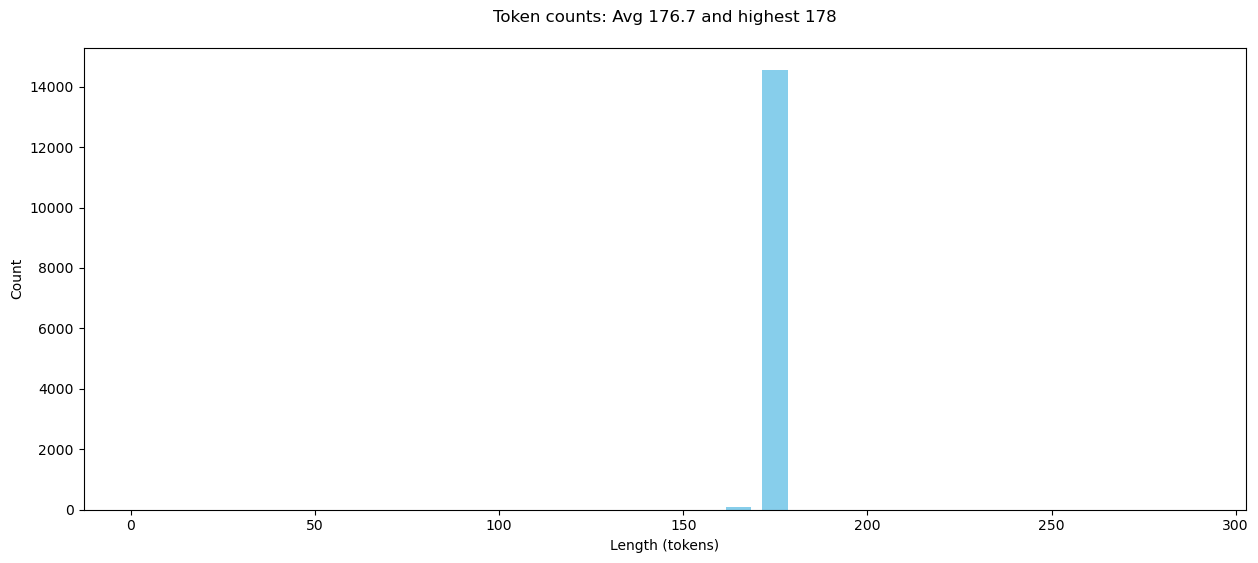

In [23]:
# Plot the distribution of token counts again

tokens = [item.token_count for item in items]
plt.figure(figsize=(15, 6))
plt.title(f"Token counts: Avg {sum(tokens)/len(tokens):,.1f} and highest {max(tokens):,}\n")
plt.xlabel('Length (tokens)')
plt.ylabel('Count')
plt.hist(tokens, rwidth=0.7, color="skyblue", bins=range(0, 300, 10))
plt.show()

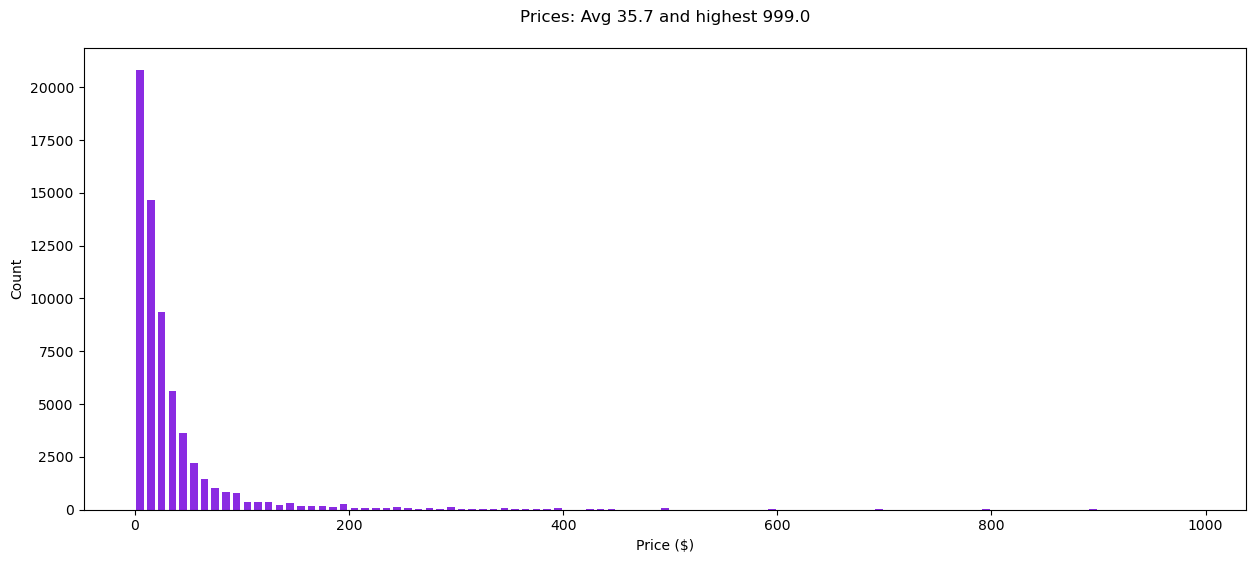

In [13]:
# Plot the distribution of prices

prices = [item.price for item in items]
plt.figure(figsize=(15, 6))
plt.title(f"Prices: Avg {sum(prices)/len(prices):,.1f} and highest {max(prices):,}\n")
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.hist(prices, rwidth=0.7, color="blueviolet", bins=range(0, 1000, 10))
plt.show()

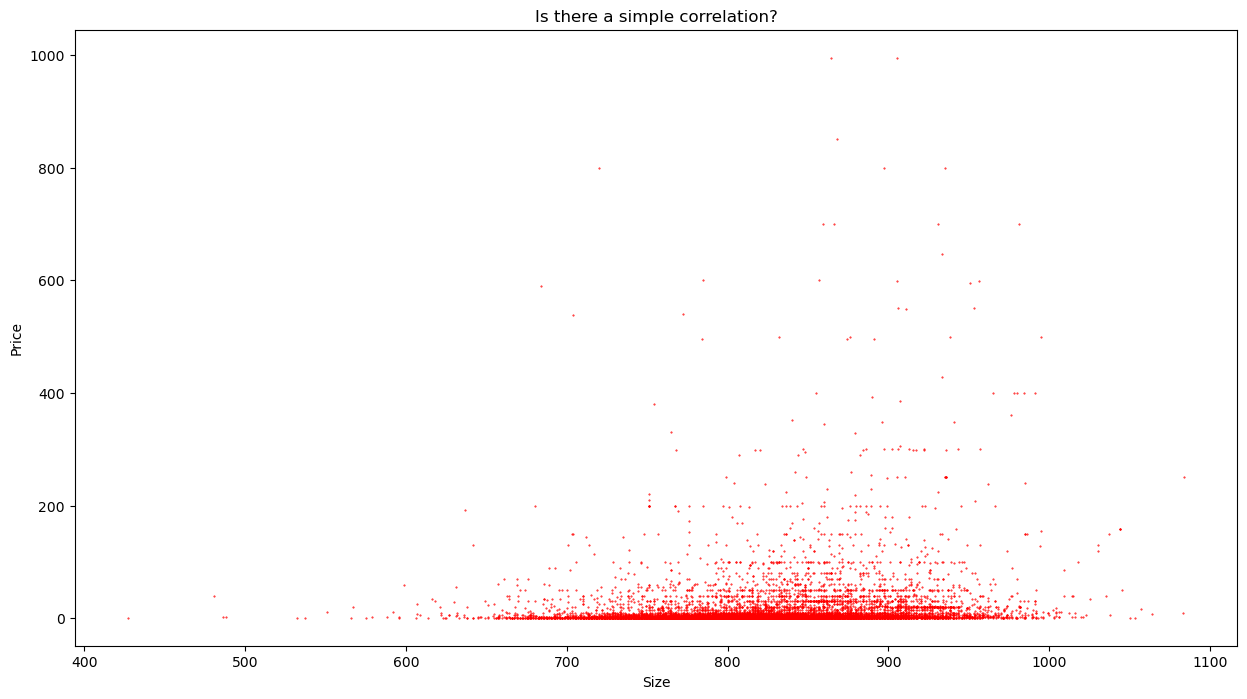

In [24]:
# How does the price vary with the character count of the prompt?

sample = items

sizes = [len(item.prompt) for item in sample]
prices = [item.price for item in sample]

# Create the scatter plot
plt.figure(figsize=(15, 8))
plt.scatter(sizes, prices, s=0.2, color="red")

# Add labels and title
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Is there a simple correlation?')

# Display the plot
plt.show()

In [25]:
def report(item):
    prompt = item.prompt
    tokens = Item.tokenizer.encode(item.prompt)
    print(prompt)
    print(tokens[-10:])
    print(Item.tokenizer.batch_decode(tokens[-10:]))

In [26]:
report(sample[50])

How much does this cost to the nearest dollar?

Boohbah Wiggle & Giggle (PC & Mac)
Humbah, Zumbah, Zing Zing Zingbah, Jumbah and Jingbah are five sparkling atoms of energy powered by laughter of children! In this CD-ROM adventure you can create your own Boohbah exercise routine, make your own real Boohbah music, play a Look What I Can Do! matching game, and play a silly game with Little Dog Fido! Offers children imaginative interactive environment where they explore and discover Gets children involved from top of their heads to the tips of their toes Learn cause & affect, citical thinking, problem solving, matching, patterns and more Print your creations for ages 2-5 Is Discontinued Yes, Dimensions 7.6 x 5.2 x

Price is $3.00
[13, 17, 865, 271, 7117, 374, 400, 18, 13, 410]
['.', '2', ' x', '\n\n', 'Price', ' is', ' $', '3', '.', '00']


In [29]:
random.seed(42)
random.shuffle(sample)
train = sample[:11708]
test = sample[11708:14635]
print(f"Divided into a training set of {len(train):,} items and test set of {len(test):,} items")


Divided into a training set of 11,708 items and test set of 2,927 items


In [30]:
print(train[0].prompt)

How much does this cost to the nearest dollar?

Lawn Mower Green Grass
Lawn Mower Green Grass - oakley cutting grass tractor simulator!The screen is the backyard of your house with green fresh grass, your fingers controls the lawn mower on it!Ever sunday dreamed about your own house?With green grass on the oakley backyard? Want to mow easily your cutting lawn at weekends and feel the smell of new-mown grass?Good job for lazy sunday!Play Lawn Mower Green Grass right now! Lawn Mower Green Grass - oakley cutting grass tractor simulator! The screen is the backyard of your house with green fresh grass, your fingers controls the lawn mower on it! Ever sunday dreamed about your own house? With green grass on the oakley backyard? Want to mow easily your cutting lawn at weekends and feel the

Price is $1.00


In [31]:
print(test[0].test_prompt())

How much does this cost to the nearest dollar?

Fine Bass Tuner
Fine Bass Tuner is a chromatic tuner designed for bass instruments that allows you to quickly and accurately tune your instrument using the built-in mic in your Android device. Features nice and clean interface allowing you to quickly find your pitch.The Fine Bass Tuner is a version of my Fine Chromatic Tuner that was adjusted and designed for bass. I believe that it will work with any low to mid range instrument as it was fine adjusted for the 20 Hz - 300 Hz.This is automatic chromatic tuner that supports every screen size. Fine Bass Tuner works well with devices supporting 44100 16 bit audio input (almost every phone and tablet in mid - high price range) and 22050 16 bit audio input. It still works with the other possible settings

Price is $


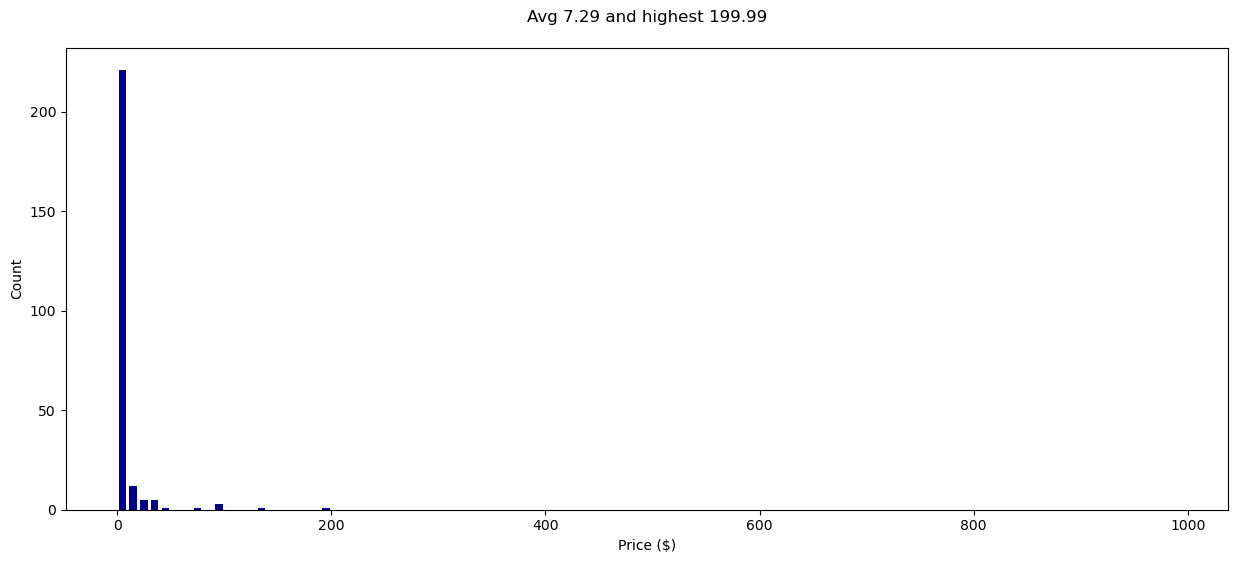

In [32]:
# Plot the distribution of prices in the first 250 test points

prices = [float(item.price) for item in test[:250]]
plt.figure(figsize=(15, 6))
plt.title(f"Avg {sum(prices)/len(prices):.2f} and highest {max(prices):,.2f}\n")
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.hist(prices, rwidth=0.7, color="darkblue", bins=range(0, 1000, 10))
plt.show()

In [33]:
train_prompts = [item.prompt for item in train]
train_prices = [item.price for item in train]
test_prompts = [item.test_prompt() for item in test]
test_prices = [item.price for item in test]

In [34]:
# Create a Dataset from the lists

train_dataset = Dataset.from_dict({"text": train_prompts, "price": train_prices})
test_dataset = Dataset.from_dict({"text": test_prompts, "price": test_prices})
dataset = DatasetDict({
    "train": train_dataset,
    "test": test_dataset
})

In [35]:
DATASET_NAME = "hamzabaccouri/software-data"
dataset.push_to_hub(DATASET_NAME, private=True)

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/12 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/hamzabaccouri/software-data/commit/af098367fad3e5e5eaea3a2fb3d52408503eb73e', commit_message='Upload dataset', commit_description='', oid='af098367fad3e5e5eaea3a2fb3d52408503eb73e', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/hamzabaccouri/software-data', endpoint='https://huggingface.co', repo_type='dataset', repo_id='hamzabaccouri/software-data'), pr_revision=None, pr_num=None)

In [36]:
# One more thing!
# Let's pickle the training and test dataset so we don't have to execute all this code next time!

with open('train_lite.pkl', 'wb') as file:
    pickle.dump(train, file)

with open('test_lite.pkl', 'wb') as file:
    pickle.dump(test, file)